<a href="https://colab.research.google.com/github/Rikirui/Rikirui/blob/main/T_shirts_and_Pants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup and Load Data


##1.1 Install Dependencies and Setup

In [ ]:
!pip install tensorflow
#tensorflow and tensorflow gpu are part of the deep learning pipeline itself，我没有GPU，GPU部分不用写

In [2]:
!pip install --upgrade pip
!python --version

Python 3.10.12


In [3]:
!pip install opencv-python
#open cv to remove doggy image

In [5]:
!pip install matplotlip
#matplotlip to be used visualize images

In [ ]:
!pip list
#查看pip里面的版本

In [4]:
import tensorflow as tf
import os

In [ ]:
os.path.join('data','happy')
#用来分隔两个文件？

'data/happy'

In [ ]:
gpus=tf.config.experimental.list_physical_devices('CPU')
len(gpus)
#看自己的电脑配置：如果有GPU括号里面为GPU,没有就写CPU

1

In [ ]:
#避免OOM errors by setting GPU(CPU) Memory Consuption Growth
#如果你没有GPU并且使用CPU进行TensorFlow计算，没有必要限制GPU内存使用，因为你没有GPU内存来管理.这段省略。

##1.2 Remove dodgy images

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir='/content/drive/MyDrive/AI project/T shirt and Pants'
#create a variable to hold the path our data directory创建一个变量来保存数据目录的路径
#''里面为文件夹位置，将文件传到google drive里面去，通过点击文件右侧三个点，copy path就可以

In [ ]:
os.listdir(os.path.join(data_dir, 'Tshirt'))
#这是两个文件夹都要运行一遍，确认下29个第三个模块删除了不符合的图片

In [9]:
image_exts=['jpeg','jpg','bmp','png']


In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)，移除了除了上面定义的image_exts的类型的其他图片。如果显示os not exist需要将上面所有代码重新运行一遍，import


##1.3 Load Data

In [11]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [12]:
import numpy as np
#导入了numpy库,使用np名称空间来访问numpy提供的函数和对象。
from matplotlib import pyplot as plt
#从matplotlib库导入pyplot模块，该库提供了一组用于创建各种类型的绘图和可视化的函数。

In [ ]:
tf.keras.utils.image_dataset_from_directory??
#查看说明

In [13]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AI project/T shirt and Pants')
#括号内为自己的文件夹来源，此代码可查看文件数量和class

Found 723 files belonging to 2 classes.


In [14]:
data_iterator=data.as_numpy_iterator()

In [15]:
data_iterator

In [16]:
batch=data_iterator.next()
#Get another batch from the iterator这一步可以获取另一批batch,然后下面50.51块代码点击后也会变化

In [17]:
len(batch)
#Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [18]:
#class 1= T恤
#class 0= 裤子
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

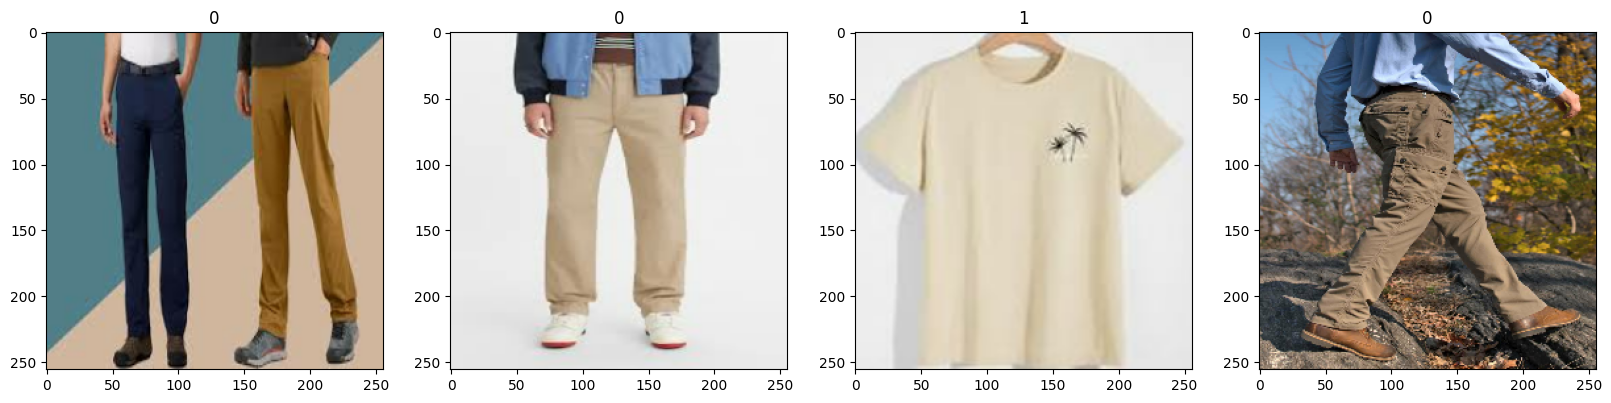

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
scaled=batch[0]/255

In [21]:
scaled.max()

1.0

#2.Preprocess Data

##2.1 Scale Data

In [22]:
data=data.map(lambda x,y:(x/255,y))
#transformation data pipeline

In [23]:
scaled_iterator=data.as_numpy_iterator()

In [24]:
batch=scaled_iterator.next()

In [25]:
batch[0].max()

1.0

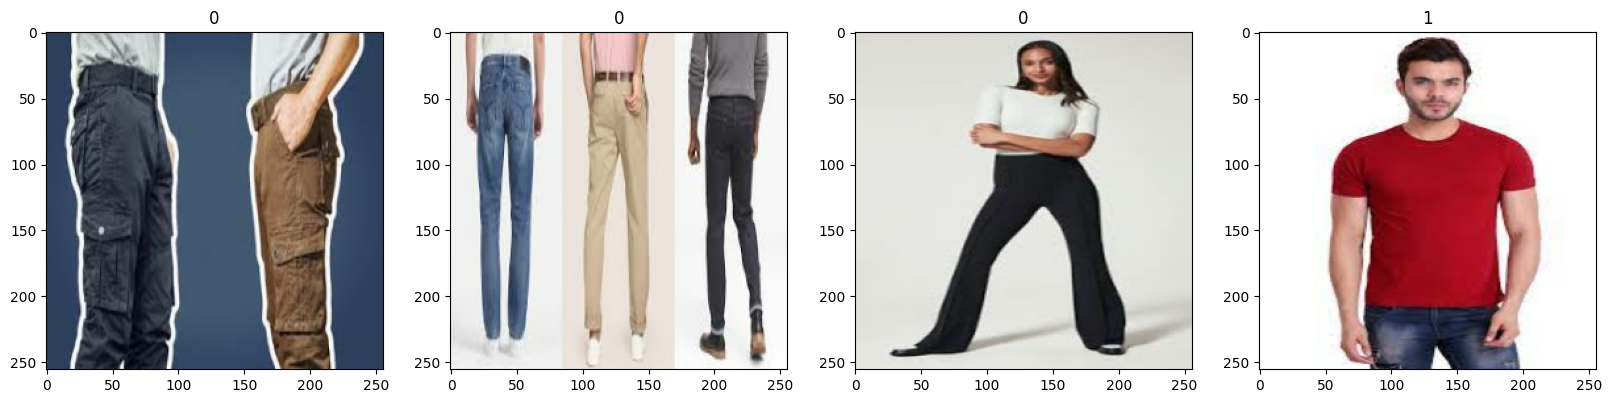

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

##2.2 Split Data

In [27]:
len(data)

23

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)
#训练集，验证集，测试集的数据分布10.4.1

In [29]:
test_size
#查看每个类别的data分布

2

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
len(test)

2

#3. Deep Learning

##3.1 Build Deep Learning Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##Train

In [37]:
logdir='logs'

In [38]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
#如果你想回来看看你的模型是如何表现的它是否在某个特定的时间点发生变化,callback回调

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#fit是训练行为的组成部分，预测是我们实际去做预测的时候
#epoch是我们实际要进行训练的时间一个epoch是我们整个训练数据集的一次运行
#然后对数据进行评估，这样我们就可以实时看到我们的模型运行得有多好

Epoch 1/20
16/16 [==============================] - 47s 3s/step - loss: 1.2607 - accuracy: 0.4902 - val_loss: 0.6926 - val_accuracy: 0.5125
Epoch 2/20
16/16 [==============================] - 57s 4s/step - loss: 0.6768 - accuracy: 0.6562 - val_loss: 0.6102 - val_accuracy: 0.6313
Epoch 3/20
16/16 [==============================] - 49s 3s/step - loss: 0.5304 - accuracy: 0.7617 - val_loss: 0.4736 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 48s 3s/step - loss: 0.3848 - accuracy: 0.8359 - val_loss: 0.4444 - val_accuracy: 0.7937
Epoch 5/20
16/16 [==============================] - 48s 3s/step - loss: 0.2977 - accuracy: 0.8828 - val_loss: 0.1802 - val_accuracy: 0.9250
Epoch 6/20
16/16 [==============================] - 44s 3s/step - loss: 0.3096 - accuracy: 0.8926 - val_loss: 0.2445 - val_accuracy: 0.9125
Epoch 7/20
16/16 [==============================] - 44s 3s/step - loss: 0.2099 - accuracy: 0.9121 - val_loss: 0.1969 - val_accuracy: 0.9438
Epoch 8/20
16/16 [==

In [40]:
hist.history

{'loss': [1.2607343196868896,
  0.676755964756012,
  0.530439019203186,
  0.38481542468070984,
  0.2976631224155426,
  0.3095502555370331,
  0.20993322134017944,
  0.20799018442630768,
  0.18922735750675201,
  0.11666451394557953,
  0.0724184587597847,
  0.07462915033102036,
  0.04196842014789581,
  0.03870625048875809,
  0.04486161842942238,
  0.017671188339591026,
  0.019901681691408157,
  0.019289107993245125,
  0.049623504281044006,
  0.04775969311594963],
 'accuracy': [0.490234375,
  0.65625,
  0.76171875,
  0.8359375,
  0.8828125,
  0.892578125,
  0.912109375,
  0.921875,
  0.94140625,
  0.970703125,
  0.982421875,
  0.974609375,
  0.990234375,
  0.986328125,
  0.986328125,
  0.998046875,
  0.994140625,
  0.99609375,
  0.98828125,
  0.9921875],
 'val_loss': [0.6925744414329529,
  0.6102063059806824,
  0.4735705256462097,
  0.44441643357276917,
  0.180166095495224,
  0.2444562464952469,
  0.19690024852752686,
  0.22125859558582306,
  0.15462149679660797,
  0.09083312749862671,
  0

##3.3 Plot Performance

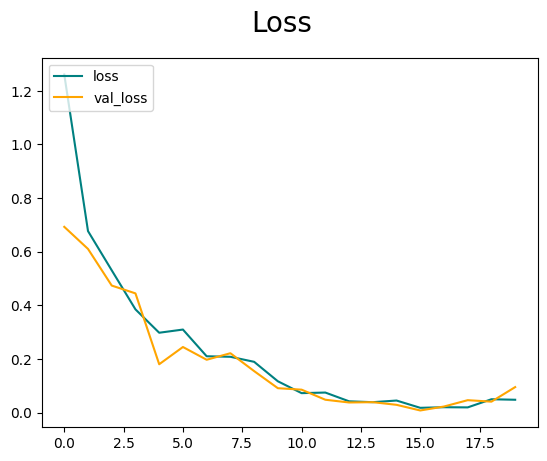

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

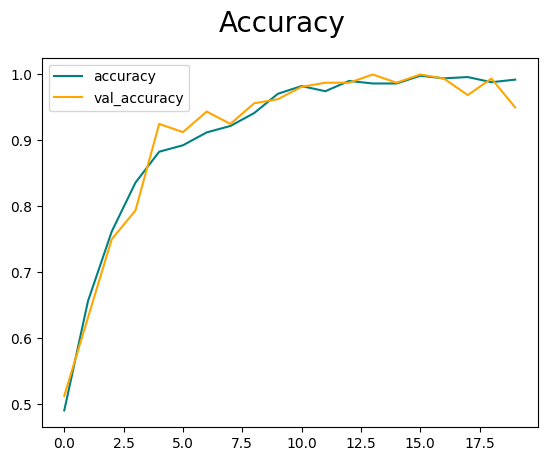

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Evaluate Performance

##4.1 Evaluate

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
len(test)

2

In [46]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 407ms/step


In [47]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()} ,Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0 ,Accuracy:1.0


#4.2 Test

In [48]:
import cv2

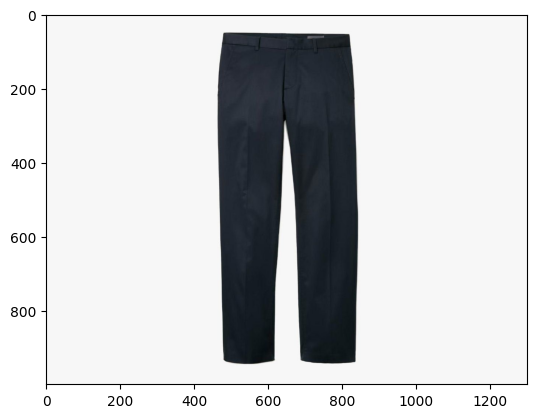

In [63]:
img = cv2.imread('/content/drive/MyDrive/AI project/Test T shirt and pants/裤子2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#CV2读的是BGR格式，图片呈现蓝色，需要转换为RGB格式
plt.show()

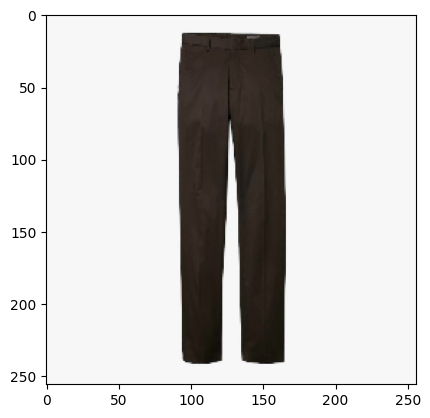

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
#格式转换成256

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [66]:
yhat

array([[1.3157976e-18]], dtype=float32)

In [67]:
if yhat> 0.5:
    print(f'这是T恤')
else:
    print(f'这是裤子')

这是裤子


#Save the model

## Save the Model

In [68]:
from tensorflow.keras.models import load_model

In [70]:
model.save(os.path.join('models','clothesmodel.h5'))

In [71]:
os.path.join('models','clothesmodel.h5')

'models/clothesmodel.h5'

In [72]:
new_model = load_model(os.path.join('models','clothesmodel.h5'))

In [73]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 104ms/step


In [75]:
if yhatnew > 0.5:
    print(f'这是T恤')
else:
    print(f'这是裤子')

这是裤子
